# Introduction to Support Vector Classification (SVC) using Scikit-Learn

## 1. Introduction

This notebook aims to provide an introduction to Support Vector Classification (SVC) using Python's Scikit-Learn library. We'll go through each step, from data preprocessing to model evaluation.

## 2. Importing Libraries

First, let's import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

## 3. Example 1

For this example, let's use the famous Iris dataset.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


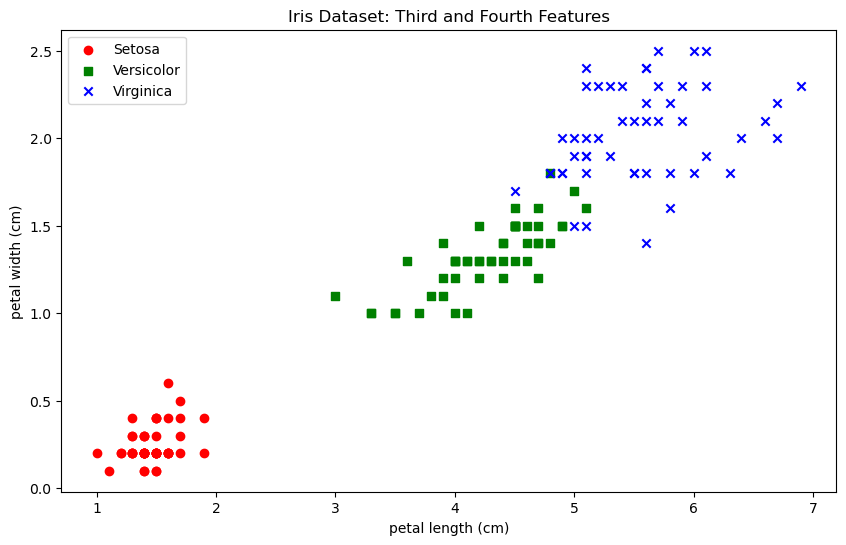

In [4]:
# Plot the third and fourth features (indexing starts from 0, so 2 and 3 correspond to the third and fourth features)
plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 0].iloc[:, 2], df[df['target'] == 0].iloc[:, 3], label='Setosa', c='r', marker='o')
plt.scatter(df[df['target'] == 1].iloc[:, 2], df[df['target'] == 1].iloc[:, 3], label='Versicolor', c='g', marker='s')
plt.scatter(df[df['target'] == 2].iloc[:, 2], df[df['target'] == 2].iloc[:, 3], label='Virginica', c='b', marker='x')

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend()
plt.title('Iris Dataset: Third and Fourth Features')
plt.show()

Split the data into training and test sets.

In [5]:
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1 Use a Linear Kernel

In [6]:
# Initialize the model with a linear kernel
clf_linear = SVC(kernel='linear')
# Train the model
clf_linear.fit(X_train, y_train)
# Make predictions
y_pred_linear = clf_linear.predict(X_test)

In [7]:
# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)

print(f'Linear Kernel Accuracy: {accuracy_linear}')
print(f'Linear Kernel Confusion Matrix: \n{conf_matrix_linear}')
print(f'Linear Kernel Classification Report: \n{class_report_linear}')

Linear Kernel Accuracy: 1.0
Linear Kernel Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Linear Kernel Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



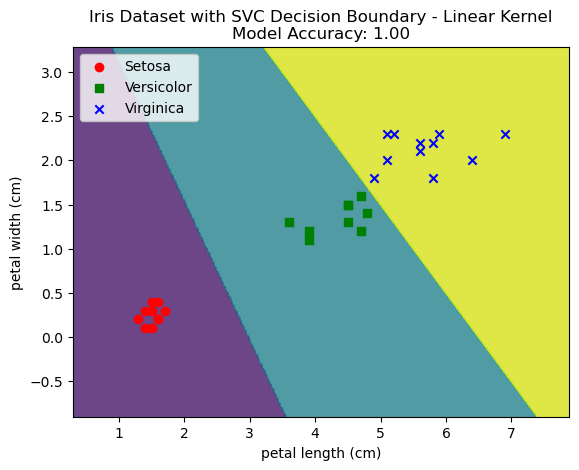

In [8]:
# Create meshgrid for the plot
h = .02  # Step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test points
markers = ['o', 's', 'x']
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in np.unique(y_test):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                c=colors[i], marker=markers[i], label=labels[i])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.title(f'Iris Dataset with SVC Decision Boundary - Linear Kernel\nModel Accuracy: {accuracy_linear:.2f}')
plt.show()

### 3.2 Use a Non-Linear Kernel (RBF)

In [9]:
# Initialize the model with an RBF kernel
clf_rbf = SVC(kernel='rbf')
# Train the model
clf_rbf.fit(X_train, y_train)
# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

In [10]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 1.0
RBF Kernel Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



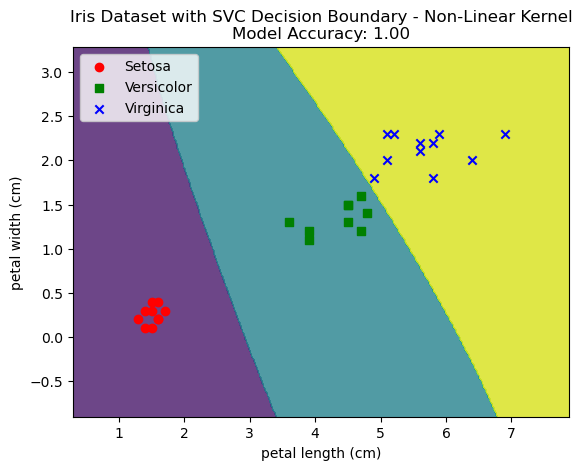

In [11]:
# Create meshgrid for the plot
h = .02  # Step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test points
markers = ['o', 's', 'x']
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in np.unique(y_test):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                c=colors[i], marker=markers[i], label=labels[i])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.title(f'Iris Dataset with SVC Decision Boundary - Non-Linear Kernel\nModel Accuracy: {accuracy_rbf:.2f}')
plt.show()

## 4. Example 2

Import libraries.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_circles

Gererate non-linearly separable data.

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, noise=0.05, random_state=42)
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature_1', 'Feature_2', 'Target'])

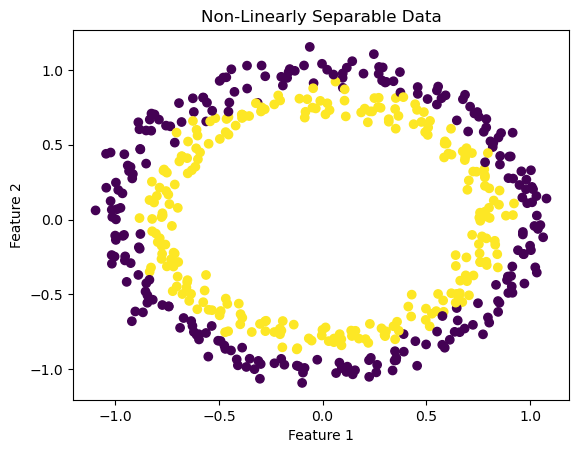

In [14]:
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-Linearly Separable Data')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['Feature_1', 'Feature_2']], df['Target'], test_size=0.2, random_state=42)

### 4.1 Linear Kernel

In [16]:
# Initialize the model with a linear kernel
clf_linear = SVC(kernel='linear')
# Train the model
clf_linear.fit(X_train, y_train)
# Make predictions
y_pred_linear = clf_linear.predict(X_test)

In [17]:
# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)

print(f'RBF Kernel Accuracy: {accuracy_linear}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_linear}')
print(f'RBF Kernel Classification Report: \n{class_report_linear}')

RBF Kernel Accuracy: 0.43
RBF Kernel Confusion Matrix: 
[[43  0]
 [57  0]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

         0.0       0.43      1.00      0.60        43
         1.0       0.00      0.00      0.00        57

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



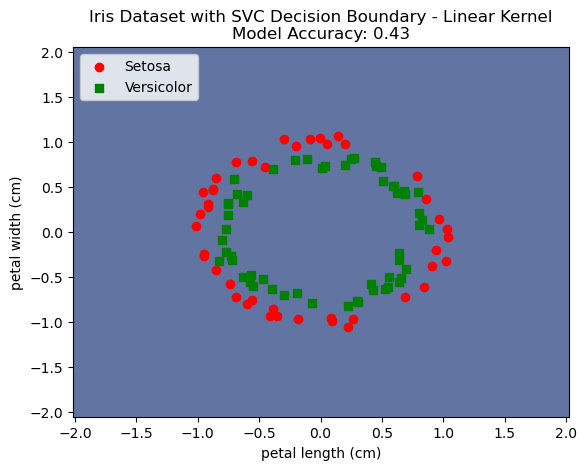

In [18]:
X_test = X_test.values
y_test = y_test.values.astype(int)

# Create meshgrid for the plot
h = .02  # Step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test points
markers = ['o', 's', 'x']
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in np.unique(y_test):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                c=colors[i], marker=markers[i], label=labels[i])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.title(f'Iris Dataset with SVC Decision Boundary - Linear Kernel\nModel Accuracy: {accuracy_linear:.2f}')
plt.show()

In [19]:
### 4.2 Non-Linear Kernel (RBF)

In [20]:
# Initialize the model with an RBF kernel
clf_rbf = SVC(kernel='rbf')
# Train the model
clf_rbf.fit(X_train, y_train)
# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

In [21]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 0.95
RBF Kernel Confusion Matrix: 
[[42  1]
 [ 4 53]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.98      0.93      0.95        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



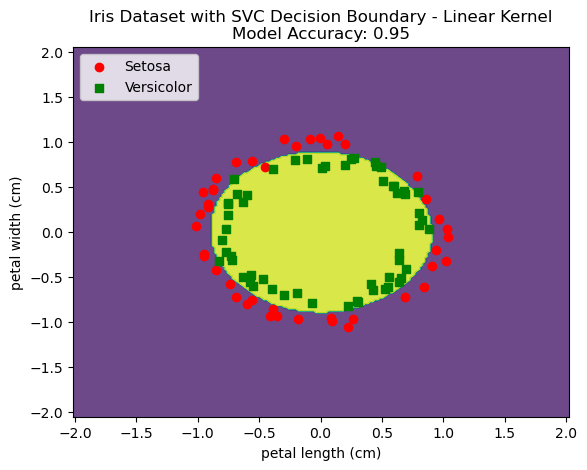

In [22]:
#X_test = X_test.values
y_test = y_test.astype(int)

# Create meshgrid for the plot
h = .02  # Step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the test points
markers = ['o', 's', 'x']
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']
for i in np.unique(y_test):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                c=colors[i], marker=markers[i], label=labels[i])

plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.title(f'Iris Dataset with SVC Decision Boundary - Linear Kernel\nModel Accuracy: {accuracy_rbf:.2f}')
plt.show()

## 5. Conclusion

In this notebook, we've explored how to implement Support Vector Classification using both linear and non-linear kernels in Scikit-Learn. We've also looked at how to evaluate the performance of these models.